In [1]:
# AUTHOR: KATS JAYATHILAKA - 209338R
# DESCRIPTION: This is an assignment done on neural networks for the machine learnining module - MSc2020
#              Classification of MNIST dataset using a deep neural network

In [2]:
# importing tensorflow lib
import tensorflow as tf

In [3]:
# importing built-in MNIST dataset
mnist = tf.keras.datasets.mnist  # 28x28 images of hand-written digits

In [4]:
# splitting into train and test sets by the default proportions
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [5]:
# imnporting libs for train test splitting
import numpy as np
from sklearn.model_selection import train_test_split

In [6]:
x = np.concatenate((x_train, x_test))  # join all rows of attribute data
y = np.concatenate((y_train, y_test))  # join all target classes

In [7]:
TRAIN_SIZE = 0.65  # custom train test split proportion

# Randome state is set to my index no.
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=TRAIN_SIZE, random_state=209338)

In [8]:
# importing plotting libs
import matplotlib.pyplot as plt

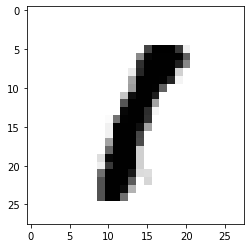

1

In [9]:
# previewing the image and the target class
plt.imshow(x_train[0], cmap=plt.cm.binary)
plt.show()
y_train[0]

In [10]:
# z-score standardization of attribute data
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

<function matplotlib.pyplot.show(*args, **kw)>

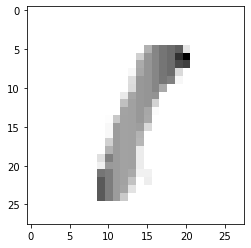

In [11]:
# previewing the image using the standardized data
plt.imshow(x_train[0], cmap=plt.cm.binary)
plt.show

In [12]:
# creating the Deep Neural Network Model
model = tf.keras.models.Sequential()  # feed-forward model

# adding input layer by flattening the input attributes into a single dimension'
model.add(tf.keras.layers.Flatten())

# adding hidden layers
model.add(tf.keras.layers.Dense(256, activation=tf.keras.activations.sigmoid))
model.add(tf.keras.layers.Dense(128, activation=tf.keras.activations.sigmoid))

# adding output layer
model.add(tf.keras.layers.Dense(10, activation=tf.keras.activations.softmax))

# compllie the model
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

Instructions for updating:
Colocations handled automatically by placer.


In [13]:
EPOCHS = 20

# training for multiple epochs
model.fit(x_train, y_train, epochs=EPOCHS)

Epoch 1/20
45500/45500 [==============================] - 11s 242us/sample - loss: 0.2665 - acc: 0.9215
Epoch 2/20
45500/45500 [==============================] - 11s 247us/sample - loss: 0.1046 - acc: 0.9674
Epoch 3/20
45500/45500 [==============================] - 13s 284us/sample - loss: 0.0671 - acc: 0.9787
Epoch 4/20
45500/45500 [==============================] - 11s 251us/sample - loss: 0.0466 - acc: 0.9850
Epoch 5/20
45500/45500 [==============================] - 11s 244us/sample - loss: 0.0349 - acc: 0.9885
Epoch 6/20
45500/45500 [==============================] - 10s 230us/sample - loss: 0.0268 - acc: 0.9909
Epoch 7/20
45500/45500 [==============================] - 12s 269us/sample - loss: 0.0201 - acc: 0.9928
Epoch 8/20
45500/45500 [==============================] - 11s 244us/sample - loss: 0.0163 - acc: 0.9944
Epoch 9/20
45500/45500 [==============================] - 10s 213us/sample - loss: 0.0163 - acc: 0.9940
Epoch 10/20
45500/45500 [==============================] - 9s 20

In [14]:
loss, accuracy = model.evaluate(x_test, y_test)

24500/24500 [==============================] - 3s 122us/sample - loss: 0.1727 - acc: 0.9702
